<a href="https://colab.research.google.com/github/Rakichwande/AI-Coursework--2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [1]:
from google.colab import files
uploaded = files.upload()

Saving e7bc3f31-0a17-493d-b8c8-176721e78a9b.jpeg to e7bc3f31-0a17-493d-b8c8-176721e78a9b.jpeg


In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:

df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

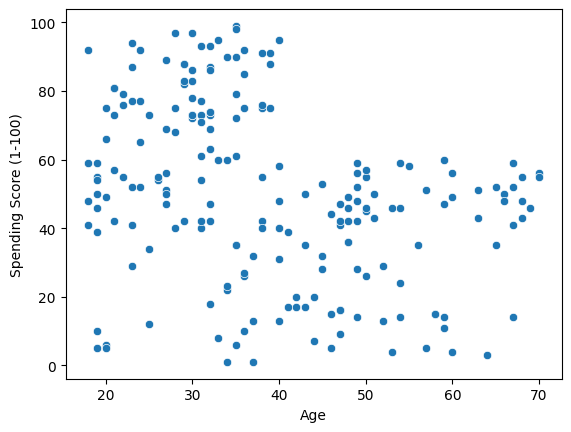

In [ ]:
import seaborn as sns
sns.scatterplot(y='Spending Score (1-100)',x='Age',data=df)

1. Younger customers spend more. Most younger customers, 35 and below have higher spending scores.
2. Older customers have lower spending score.
3. Middle-customers spend moderately.



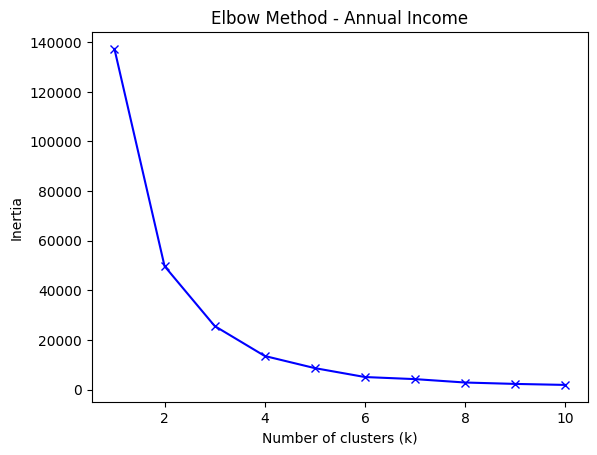

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



X1 = df[['Annual Income (k$)']]

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Annual Income')
plt.show()

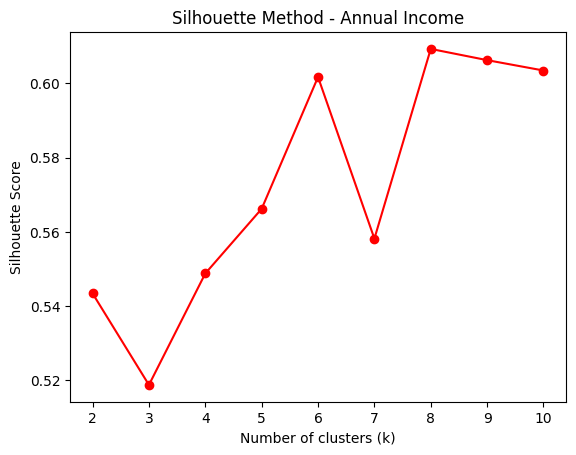

In [ ]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1)
    sil_scores.append(silhouette_score(X1, labels))

plt.plot(range(2, 11), sil_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Annual Income')
plt.show()

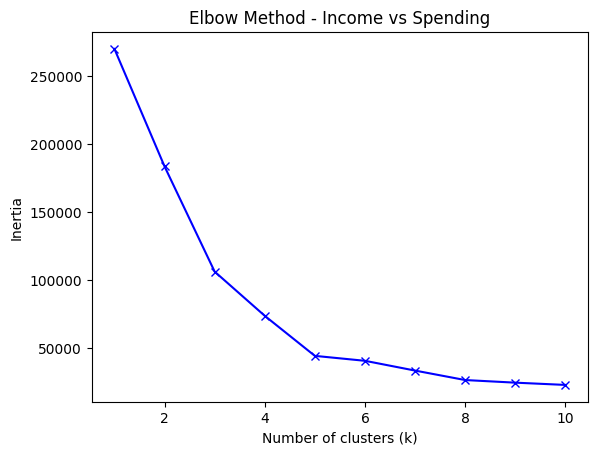

In [ ]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Income vs Spending')
plt.show()

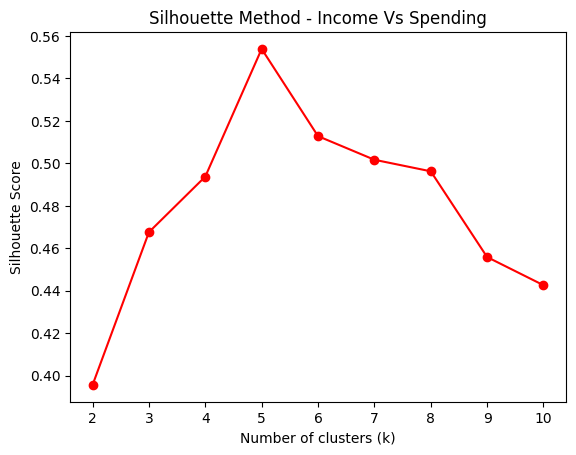

In [ ]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2)
    sil_scores.append(silhouette_score(X2, labels))

plt.plot(range(2, 11), sil_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Income Vs Spending')
plt.show()

Question 4:

Elbow method suggests k=3 clusters (clear elbow point)
Silhouette score is highest at k=8 (0.67) but also good at k=6 (0.60)
Best choice: k=3 or k=4 clusters
Limitation: Only groups customers by income level (low, medium, high income)

Question 3b - Income + Spending Score:

Elbow method suggests k=5 clusters (clear elbow point)
Silhouette score peaks at k=5 (0.55)
Both methods agree: k=5 is optimal
Advantage: Groups customers by both income AND spending behavior

Distribution Comparison:

Single feature (3a) creates simple income-based groups but misses spending patterns
Two features (3b) creates more meaningful customer segments by combining income with actual spending behavior
The 2-feature clustering is better for business decisions because customers with same income can have very different spending habits
Although 3a has higher silhouette scores, 3b provides more actionable insights for mall management




Question 5:

Cluster 1 - High Income, High Spending:

Create VIP membership programs with exclusive benefits
Offer premium services like personal shoppers and priority parking
Host luxury brand events and private sales

Cluster 2 - High Income, Low Spending:

Send targeted promotions to encourage more spending
Offer premium experience-based services (spa, fine dining)
Provide incentives like "spend more, save more" deals

Cluster 3 - Medium Income, Medium Spending:

Implement loyalty points programs
Run seasonal sales and family-friendly promotions
Offer mid-range product bundles and combo deals

Cluster 4 - Low Income, High Spending:

Provide flexible payment options (installments, layaway)
Create flash sales and limited-time offers
Focus on affordable fashion and trendy items

Cluster 5 - Low Income, Low Spending:

Emphasize discount stores and clearance sections
Offer special budget shopping days
Provide free entertainment to increase mall visits
Focus on essential items (groceries, pharmacy)